In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

# Register FromzenLake with is_slippery False
register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4', 'is_slippery': False}
)

env = gym.make('FrozenLake-v3')
env.render()

[2017-08-02 16:06:26,413] Making new env: FrozenLake-v3



SFFF
FHFH
FFFH
HFFG


In [2]:
# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Discount factor
dis = .99
num_episodes = 2000

# Create lists to contain total rewards and steps per spisode
rList = []

for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False
    
    # e-greedy
    e = 1. / ((i//100) + 1)
    
    # The Q-Table learning algorithm
    while not done:
        # Choose an action by greedy
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
            
        
        # Get new state and reward from environment
        new_state, reward, done, _ = env.step(action)
        
        # Update Q-Table with new knowledge using learning rate
        Q[state, action] = reward + dis * np.max(Q[new_state, :])
        
        rAll += reward
        state = new_state
    
    rList.append(rAll)

Success rate: 0.807
Final Q-Table Values
LEFT DOWN RIGHT UP
[[ 0.94148015  0.95099005  0.95099005  0.94148015]
 [ 0.94148015  0.          0.96059601  0.95099005]
 [ 0.95099005  0.970299    0.95099005  0.96059601]
 [ 0.96059601  0.          0.          0.        ]
 [ 0.95099005  0.96059601  0.          0.94148015]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.9801      0.          0.96059601]
 [ 0.          0.          0.          0.        ]
 [ 0.96059601  0.          0.970299    0.95099005]
 [ 0.96059601  0.9801      0.9801      0.        ]
 [ 0.970299    0.99        0.          0.970299  ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.9801      0.99        0.970299  ]
 [ 0.9801      0.99        1.          0.9801    ]
 [ 0.          0.          0.          0.        ]]


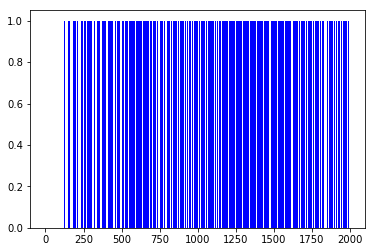

In [3]:
print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()